<a href="https://colab.research.google.com/github/isacNepo/aulas_faculdade/blob/master/Aula_L%C3%B3gica_Fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lógica Fuzzy - Estudo de Caso das Gorjetas

Para relembrarmos das regras:

**Antecedentes (entrada)**:

Serviço: Que nota voce daria para o serviço, em uma escala de 0 a 10?
  - ruim, aceitável, ótimo

Qualidade da comida: Quão saborosa estava a comida, em uma escala de 0 a 10?
  - ruim, boa, saborosa

**Consequentes (saídas):**

Gorjeta: Quanto de gorjeta voce daria, entre 0% e 20%
  - baixa, média, alta

**Regras:**
  - Se a qualidade da comida for **ruim** OU o serviço for **ruim**, então a gorjeta deve ser **baixa**
  - Se o serviço for **médio** a gorjeta deve ser **média**
  -  Se o serviço for **bom e a qualidade da comida for **saborosa**, então a gorjeta deve ser **alta**

## Instalação e importação das bibliotecas necessárias

In [3]:
# instalar a biblioteca de lógica fuzzy que utilizaremos
!pip install scikit-fuzzy

In [4]:
# bibliotecas necessárias
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

## Antecedentes e consequentes

In [5]:
# Antecedentes:
qualidade = ctrl.Antecedent(np.arange(0, 11, 1), 'qualidade')
servico = ctrl.Antecedent(np.arange(0, 11, 1), 'servico')

In [6]:
# Consequente:
gorjeta = ctrl.Consequent(np.arange(0, 21, 1), 'gorjeta')

## Função de Membership

In [7]:
# popula automaticamente o universo (0 a 10) com esses valores, dentro dessas categorias
qualidade.automf(number=3, names=['ruim', 'boa', 'saborosa'])
servico.automf(number=3, names=['ruim', 'aceitável', 'ótimo'])

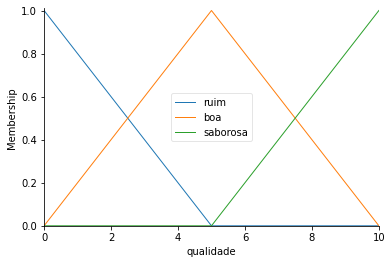

In [8]:
qualidade.view()

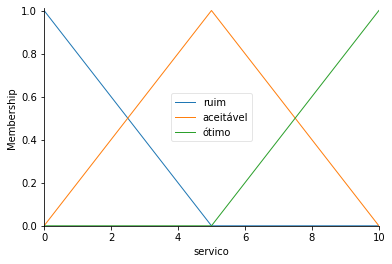

In [9]:
servico.view()

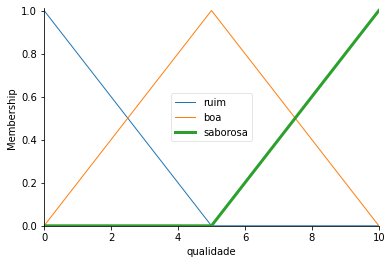

In [10]:
qualidade['saborosa'].view()

In [34]:
#trimf = função triângular
gorjeta['baixa'] = fuzz.trimf(gorjeta.universe, [0, 0, 8]) #inicio, pico, fim
gorjeta['media'] = fuzz.trimf(gorjeta.universe, [2, 10, 18])
gorjeta['alta'] = fuzz.trimf(gorjeta.universe, [12, 20, 20])

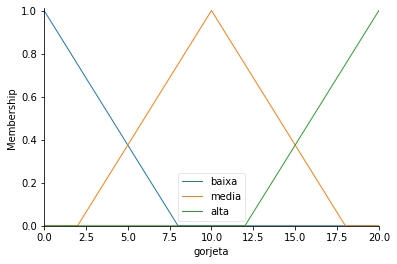

In [35]:
gorjeta.view()

In [36]:
# criação das regras
regra1 = ctrl.Rule(qualidade['ruim'] | servico['ruim'], gorjeta['baixa'])
regra2 = ctrl.Rule(servico['aceitável'], gorjeta['media'])
regra3 = ctrl.Rule(servico['ótimo'] | qualidade['saborosa'], gorjeta['alta'])

## Sistema de controle

In [37]:
sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3])

In [38]:
sistema = ctrl.ControlSystemSimulation(sistema_controle)

In [39]:
sistema.input['qualidade'] = 6
sistema.input['servico'] = 8

In [40]:
sistema.compute()

In [42]:
print('Gorjeta sugerida: ' , sistema.output['gorjeta'], '%')

Gorjeta sugerida:  12.446091094493543 %


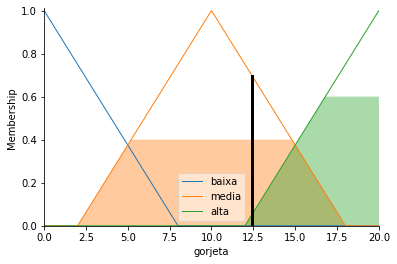

In [43]:
gorjeta.view(sim = sistema)